# 250514 Nice two column latex plot for thesis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd


In [64]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "darkorange" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "mediumpurple" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

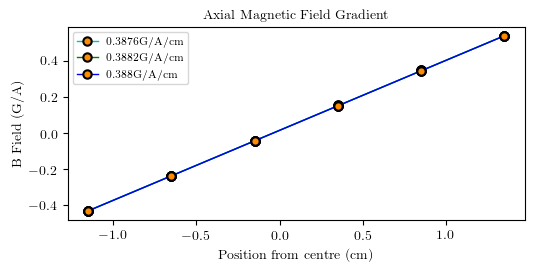

In [51]:
# raw data from mariame

Dist = [2.5,2,1.5,1,0.5,0]

Dist = np.flip(Dist)+2.55 - 7.4/2

F1 = [-4.31,-2.38,-0.46,1.52,3.47,5.35]
F2 = [-4.32,-2.39,-0.46,1.52,3.46,5.36]
F3 = [-4.32,-2.39,-0.47,1.51,3.46,5.35]

F1=np.array(F1)/10
F2=np.array(F2)/10
F3=np.array(F3)/10

plt.grid()
plt.xlabel("Position from centre (cm)")
plt.ylabel("B Field (G/A)")
plt.title("Axial Magnetic Field Gradient")

plt.plot(Dist, F1, 'co')
plt.plot(Dist, F2, 'go')
plt.plot(Dist, F3, 'bo')


T1, intercept1 = np.polyfit(Dist, F1, 1)
T2, intercept2 = np.polyfit(Dist, F2, 1)
T3, intercept3 = np.polyfit(Dist, F3, 1)

err=np.stack([F1,F2,F3]).std(0)
#plt.errorbar(Dist,F3,yerr = err,ecolor='k',fmt='none')

plt.plot(Dist, np.poly1d(np.polyfit(Dist, F1, 1))(Dist),'c' , label = str("{:.4f}".format(T1))+"G/A/cm")
plt.plot(Dist, np.poly1d(np.polyfit(Dist, F2, 1))(Dist),'g', label = str("{:.4f}".format(T2))+"G/A/cm")
plt.plot(Dist, np.poly1d(np.polyfit(Dist, F3, 1))(Dist), 'b', label = str(0.388)+"G/A/cm")

plt.legend()

In [52]:
data = np.stack([F1, F2, F3])
point_means = data.mean(axis=0)
point_stds = data.std(axis=0)
print("Means:", point_means)
print("Standard deviations (error bars):", point_stds)

Means: [-0.43166667 -0.23866667 -0.04633333  0.15166667  0.34633333  0.53533333]
Standard deviations (error bars): [0.0004714 0.0004714 0.0004714 0.0004714 0.0004714 0.0004714]


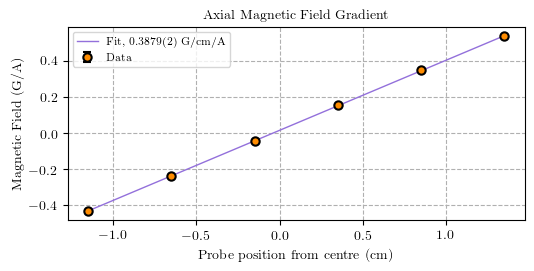

In [53]:

plt.xlabel("Probe position from centre (cm)")
plt.ylabel("Magnetic Field (G/A)")
plt.title("Axial Magnetic Field Gradient")

# Plot average with error bars
plt.errorbar(Dist, point_means, yerr=point_stds, fmt='ko', ecolor='black', capsize=3, label='Data')

# Fit and plot the linear regression line for the average
avg_slope, avg_intercept = np.polyfit(Dist, point_means, 1)
std_dev = np.std([T1,T2,T3])
plt.plot(Dist, np.poly1d([avg_slope, avg_intercept])(Dist), '-',color='mediumpurple', label=f"Fit, {avg_slope:.4f}({std_dev*10000:.0f}) G/cm/A")

plt.legend()

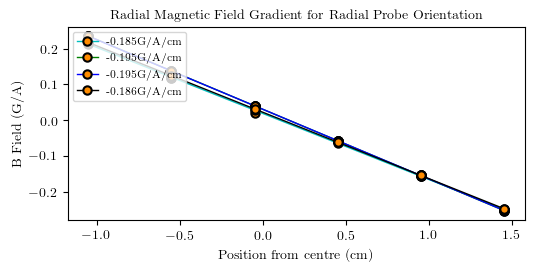

In [ ]:
#Radial RADPROBE
Dist = [2.5,2,1.5,1,0.5,0]

Dist = np.flip(Dist)+4.2-10.5/2 

F1 = [2.16,1.18,0.2,-0.58,-1.54,-2.53]
F2 = [2.36,1.37,0.4,-0.58,-1.54,-2.54]
F3 = [2.36,1.37,0.39,-0.58,-1.54,-2.53]
F4 = [2.16,1.18,0.39,-0.58,-1.54,-2.53]

F1=np.array(F1)/10
F2=np.array(F2)/10
F3=np.array(F3)/10
F4=np.array(F4)/10

plt.grid()
plt.xlabel("Position from centre (cm)")
plt.ylabel("B Field (G/A)")
plt.title("Radial Magnetic Field Gradient for Radial Probe Orientation")

plt.plot(Dist, F1, 'co')
plt.plot(Dist, F2, 'go')
plt.plot(Dist, F3, 'bo')
plt.plot(Dist, F4, 'ko')

T1, intercept1 = np.polyfit(Dist, F1, 1)
T2, intercept2 = np.polyfit(Dist, F2, 1)
T3, intercept3 = np.polyfit(Dist, F3, 1)
T4, intercept4 = np.polyfit(Dist, F4, 1)

plt.plot(Dist, np.poly1d(np.polyfit(Dist, F1, 1))(Dist),'c' , label = str("{:.3f}".format(T1))+"G/A/cm")
plt.plot(Dist, np.poly1d(np.polyfit(Dist, F2, 1))(Dist),'g', label = str("{:.3f}".format(T2))+"G/A/cm")
plt.plot(Dist, np.poly1d(np.polyfit(Dist, F3, 1))(Dist), 'b', label = str("{:.3f}".format(T3))+"G/A/cm")
plt.plot(Dist, np.poly1d(np.polyfit(Dist, F4, 1))(Dist),'k', label = str("{:.3f}".format(T4))+"G/A/cm")

plt.legend()

In [44]:
# Stack the new radial probe data
radial_data = np.stack([F1, F2, F3, F4])
radial_means = radial_data.mean(axis=0)
radial_stds = radial_data.std(axis=0)
print("Radial probe means:", radial_means)
print("Radial probe standard deviations (error bars):", radial_stds)

Radial probe means: [ 0.226    0.1275   0.0345  -0.058   -0.154   -0.25325]
Radial probe standard deviations (error bars): [0.01       0.0095     0.00838153 0.         0.         0.00043301]


In [48]:
np.mean([T1,T2,T3,T4]),np.std([T1,T2,T3,T4])

(-0.19047142857142857, 0.0048595582229714026)

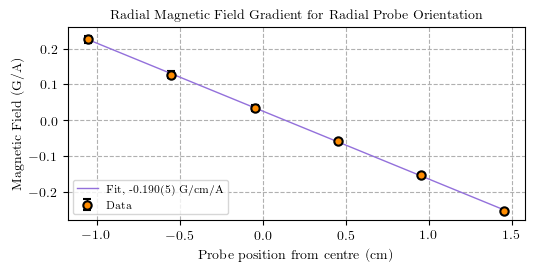

In [49]:
plt.xlabel("Probe position from centre (cm)")
plt.ylabel("Magnetic Field (G/A)")
plt.title("Radial Magnetic Field Gradient for Radial Probe Orientation")

# Plot average with error bars
plt.errorbar(Dist, radial_means, yerr=radial_stds, fmt='ko', ecolor='black', capsize=3, label='Data')

# Fit and plot the linear regression line for the average
radial_slope, radial_intercept = np.polyfit(Dist, radial_means, 1)
radial_std = np.std([T1, T2, T3, T4])
plt.plot(Dist, np.poly1d([radial_slope, radial_intercept])(Dist), '-', color='mediumpurple',
         label=f"Fit, {radial_slope:.3f}({radial_std*1000:.0f}) G/cm/A")

plt.legend(loc='lower left')

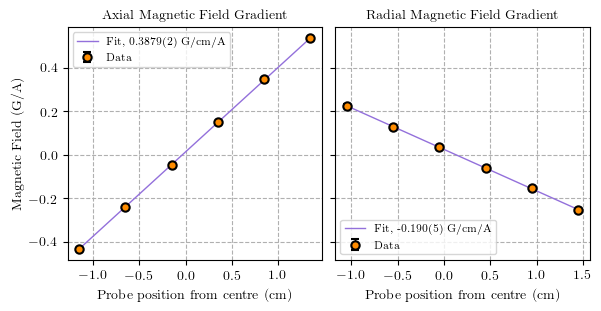

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)

Dist = [2.5,2,1.5,1,0.5,0]

Dist = np.flip(Dist)+2.55 - 7.4/2

F1 = [-4.31,-2.38,-0.46,1.52,3.47,5.35]
F2 = [-4.32,-2.39,-0.46,1.52,3.46,5.36]
F3 = [-4.32,-2.39,-0.47,1.51,3.46,5.35]

F1=np.array(F1)/10
F2=np.array(F2)/10
F3=np.array(F3)/10

T1, intercept1 = np.polyfit(Dist, F1, 1)
T2, intercept2 = np.polyfit(Dist, F2, 1)
T3, intercept3 = np.polyfit(Dist, F3, 1)

data = np.stack([F1, F2, F3])
point_means = data.mean(axis=0)
point_stds = data.std(axis=0)

ax1.set_xlabel("Probe position from centre (cm)")
ax1.set_ylabel("Magnetic Field (G/A)")
ax1.set_title("Axial Magnetic Field Gradient")

# Plot average with error bars
ax1.errorbar(Dist, point_means, yerr=point_stds, fmt='ko', ecolor='black', capsize=3, label='Data')

# Fit and plot the linear regression line for the average
avg_slope, avg_intercept = np.polyfit(Dist, point_means, 1)
std_dev = np.std([T1,T2,T3])
ax1.plot(Dist, np.poly1d([avg_slope, avg_intercept])(Dist), '-',color='mediumpurple', label=f"Fit, {avg_slope:.4f}({std_dev*10000:.0f}) G/cm/A")

ax1.legend()




Dist = [2.5,2,1.5,1,0.5,0]

Dist = np.flip(Dist)+4.2-10.5/2 

F1 = [2.16,1.18,0.2,-0.58,-1.54,-2.53]
F2 = [2.36,1.37,0.4,-0.58,-1.54,-2.54]
F3 = [2.36,1.37,0.39,-0.58,-1.54,-2.53]
F4 = [2.16,1.18,0.39,-0.58,-1.54,-2.53]

F1=np.array(F1)/10
F2=np.array(F2)/10
F3=np.array(F3)/10
F4=np.array(F4)/10

T1, intercept1 = np.polyfit(Dist, F1, 1)
T2, intercept2 = np.polyfit(Dist, F2, 1)
T3, intercept3 = np.polyfit(Dist, F3, 1)
T4, intercept4 = np.polyfit(Dist, F4, 1)

radial_data = np.stack([F1, F2, F3, F4])
radial_means = radial_data.mean(axis=0)
radial_stds = radial_data.std(axis=0)

ax2.set_xlabel("Probe position from centre (cm)")
# ax2.set_ylabel("Magnetic Field (G/A)")
ax2.set_title("Radial Magnetic Field Gradient")

# Plot average with error bars
ax2.errorbar(Dist, radial_means, yerr=radial_stds, fmt='ko', ecolor='black', capsize=3, label='Data')

# Fit and plot the linear regression line for the average
radial_slope, radial_intercept = np.polyfit(Dist, radial_means, 1)
radial_std = np.std([T1, T2, T3, T4])
plt.plot(Dist, np.poly1d([radial_slope, radial_intercept])(Dist), '-', color='mediumpurple',
         label=f"Fit, {radial_slope:.3f}({radial_std*1000:.0f}) G/cm/A")

plt.legend(loc='lower left')

plt.savefig("250514 3DMOTCoilCalibrationAxialRadial.pdf", dpi=300)

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))


(array([   2.44380952, -147.09326984]), array([519.7015873]), 2, array([1.40188091, 0.1863596 ]), 3.9968028886505635e-15)


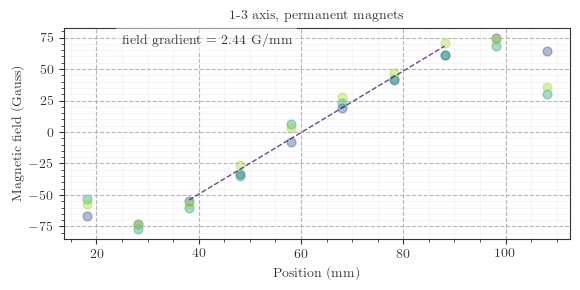

In [67]:

data13 = create_data_frame(displacement13, field131, field132, field133)
plot_field_data(data13, xrange=[15,110], figure_title='1-3 axis, permanent magnets', fit=True, fitRange=[35,90], labelPosition=(25,70))


In [112]:
position13 = np.array(data13['position'])[1:]-65
field131 = np.array(data13['field1'])[1:]
field132 = np.array(data13['field2'])[1:]
field133 = np.array(data13['field3'])[1:]
field13_mean = np.mean([field131, field132, field133], axis=0)
field13_std = np.std([field131, field132, field133], axis=0)

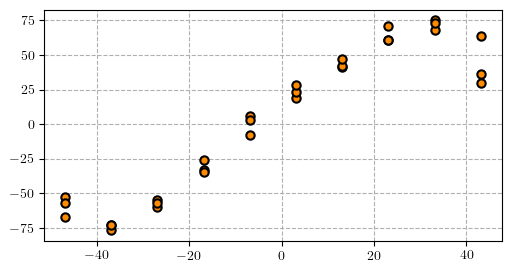

In [113]:
plt.plot(position13, field131, 'ro', label='Field 1')
plt.plot(position13, field132, 'go', label='Field 2')
plt.plot(position13, field133, 'bo', label='Field 3')

Fit gradient: 23.9940 ± 0.5191 G/cm


Text(0, 0.5, 'Magnetic Field (G)')

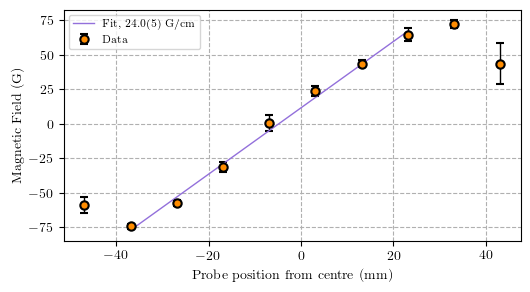

In [114]:
from scipy.optimize import curve_fit

plt.errorbar(position13, field13_mean, yerr=field13_std, fmt='ko', ecolor='black', capsize=3, label='Data')
# Define linear function
def linear(x, m, c):
    return m * x + c

# Select 2nd to 8th points (Python index 1 to 7, exclusive of 8)
x_fit = position13[1:8]
y_fit = field13_mean[1:8]
yerr_fit = field13_std[1:8]

# Perform weighted linear fit
popt, pcov = curve_fit(linear, x_fit, y_fit, sigma=yerr_fit, absolute_sigma=True)
slope, intercept = popt
slope_err = np.sqrt(pcov[0, 0])

print(f"Fit gradient: {slope*10:.4f} ± {slope_err*10:.4f} G/cm")

# Plot the fitted line over the data
x_line = np.linspace(np.min(x_fit), np.max(x_fit), 100)
plt.plot(x_line, linear(x_line, slope, intercept), '-', color='mediumpurple', label='Fit, {:.1f}({:.0f}) G/cm'.format(slope*10, slope_err*100))
plt.legend()

plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")

(array([ -2.36      , 140.69377778]), array([506.71111111]), 2, array([1.40188091, 0.1863596 ]), 3.9968028886505635e-15)


/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))


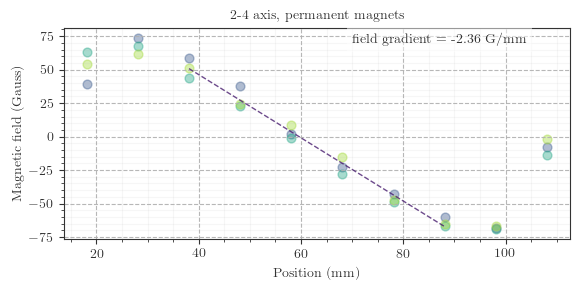

In [102]:

data24 = create_data_frame(displacement24, field241, field242, field243)
plot_field_data(data24, xrange=[15,110], figure_title='2-4 axis, permanent magnets', fit=True, fitRange=[35,90], labelPosition=(70,70))



Fit gradient: -23.2843 ± 1.0564 G/cm


Text(0.5, 1.0, '2-4 axis, permanent magnets')

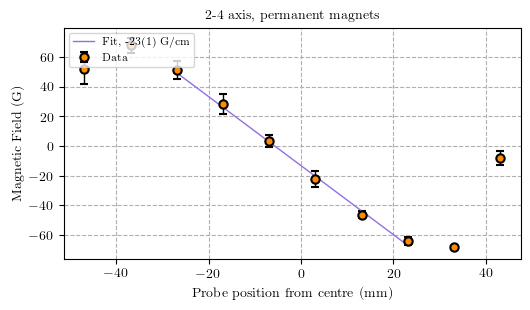

In [115]:
from scipy.optimize import curve_fit

# Prepare data for 2-4 axis (permanent magnets)
position24 = np.array(data24['position'])[1:] - 65
field241 = np.array(data24['field1'])[1:]
field242 = np.array(data24['field2'])[1:]
field243 = np.array(data24['field3'])[1:]
field24_mean = np.mean([field241, field242, field243], axis=0)
field24_std = np.std([field241, field242, field243], axis=0)

# Plot individual field measurements
# plt.plot(position24, field241, 'ro', label='Field 1')
# plt.plot(position24, field242, 'go', label='Field 2')
# plt.plot(position24, field243, 'bo', label='Field 3')

# Plot mean with error bars and fit
plt.errorbar(position24, field24_mean, yerr=field24_std, fmt='ko', ecolor='black', capsize=3, label='Data')


def linear(x, m, c):
    return m * x + c

# Select 2nd to 8th points for fitting (Python index 1 to 7, exclusive of 8)
x_fit_24 = position24[2:8]
y_fit_24 = field24_mean[2:8]
yerr_fit_24 = field24_std[2:8]

popt_24, pcov_24 = curve_fit(linear, x_fit_24, y_fit_24, sigma=yerr_fit_24, absolute_sigma=True)
slope_24, intercept_24 = popt_24
slope_err_24 = np.sqrt(pcov_24[0, 0])

print(f"Fit gradient: {slope_24*10:.4f} ± {slope_err_24*10:.4f} G/cm")

x_line_24 = np.linspace(np.min(x_fit_24), np.max(x_fit_24), 100)
plt.plot(x_line_24, linear(x_line_24, slope_24, intercept_24), '-', color='mediumpurple',
         label='Fit, {:.0f}({:.0f}) G/cm'.format(slope_24*10, slope_err_24*10))

plt.legend()
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title("2-4 axis, permanent magnets")

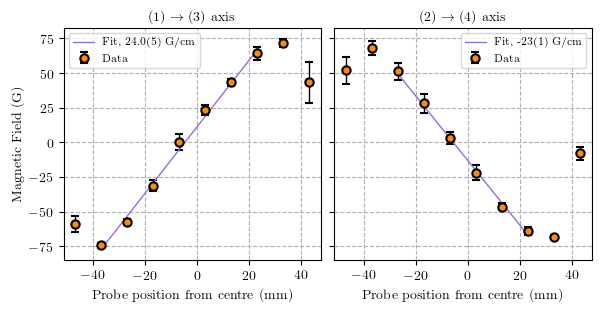

In [171]:
# NOW COMBINE BOTH PLOTS

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
ax1.set_title(r"(1) $\rightarrow \ $(3) axis")
ax2.set_title(r"(2) $\rightarrow \ $(4) axis")
ax1.set_xlabel("Probe position from centre (mm)")
ax2.set_xlabel("Probe position from centre (mm)")
ax1.set_ylabel("Magnetic Field (G)")
ax1.errorbar(position13, field13_mean, yerr=field13_std, fmt='ko', ecolor='black', capsize=3, label='Data')
ax2.errorbar(position24, field24_mean, yerr=field24_std, fmt='ko', ecolor='black', capsize=3, label='Data')
ax1.plot(x_line, linear(x_line, slope, intercept), '-', color='mediumpurple', label='Fit, {:.1f}({:.0f}) G/cm'.format(slope*10, slope_err*100))
ax2.plot(x_line_24, linear(x_line_24, slope_24, intercept_24), '-', color='mediumpurple',
         label='Fit, {:.0f}({:.0f}) G/cm'.format(slope_24*10, slope_err_24*10))
ax1.legend()
ax2.legend(loc='upper right')
plt.savefig("250515 2DMOTPermanentMagnetCalibration.pdf", dpi=300)

(array([   2.03666667, -120.26366667]), array([84.9]), 2, array([1.40414754, 0.168433  ]), 3.3306690738754696e-15)
(array([   2.52      , -147.74533333]), array([622.13333333]), 2, array([1.40414754, 0.168433  ]), 3.3306690738754696e-15)


/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be

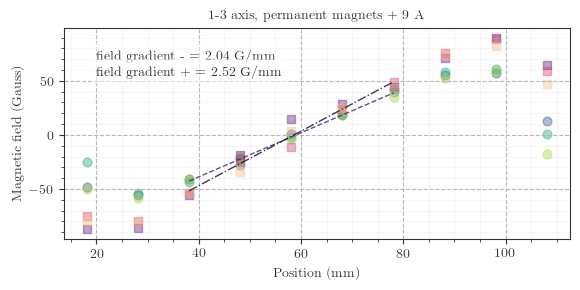

In [121]:

data13c1 = create_data_frame(displacement13c1, field13c11, field13c12, field13c13)
data13c2 = create_data_frame(displacement13c2, field13c21, field13c22, field13c23)
plot_field_data(dataframe=data13c1, dataframe2=data13c2, xrange=[15,110], figure_title='1-3 axis, permanent magnets + 9 A', fit=True, fitRange=[35,80],
                labelPosition=(20,70), doublePlot=True, fitLabels=['field gradient - ','field gradient + '])


In [123]:
data13c1

,position,field1,field2,field3,fieldAvg
0,8.1,110.0,79.0,150.0,113.000000
1,18.1,-48.0,-25.0,-50.0,-41.000000
2,28.1,-56.0,-54.0,-58.0,-56.000000
3,38.1,-41.0,-44.0,-41.0,-42.000000
4,48.1,-22.0,-28.0,-20.0,-23.333333
5,58.1,1.0,-2.0,-4.0,-1.666667
6,68.1,18.0,19.0,18.0,18.333333
7,78.1,42.0,40.0,35.0,39.000000
8,88.1,55.0,58.0,53.0,55.333333
9,98.1,57.0,61.0,59.0,59.000000


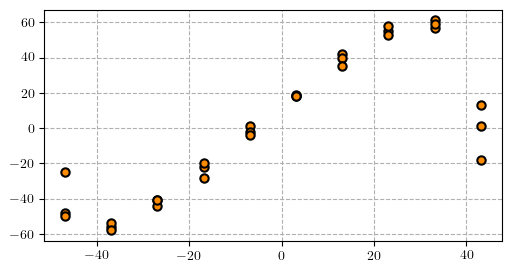

In [125]:
position13c1 = np.array(data13c1['position'])[1:]-65
field13c11 = np.array(data13c1['field1'])[1:]
field13c12 = np.array(data13c1['field2'])[1:]
field13c13 = np.array(data13c1['field3'])[1:]
field13c1_mean = np.mean([field13c11, field13c12, field13c13], axis=0)
field13c1_std = np.std([field13c11, field13c12, field13c13], axis=0)
plt.plot(position13c1, field13c11, 'ro', label='Field 1')
plt.plot(position13c1, field13c12, 'go', label='Field 2')
plt.plot(position13c1, field13c13, 'bo', label='Field 3')


Fit gradient: 19.2147 ± 0.3039 G/cm


Text(0.5, 1.0, '(1) $\\rightarrow \\ $(3) axis, permanent magnets with 9A current')

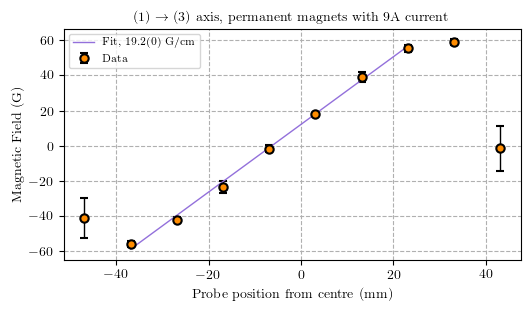

In [130]:
from scipy.optimize import curve_fit

# Calculate mean and std for 13c1
field13c1_mean = np.mean([field13c11, field13c12, field13c13], axis=0)
field13c1_std = np.std([field13c11, field13c12, field13c13], axis=0)

plt.errorbar(position13c1, field13c1_mean, yerr=field13c1_std, fmt='ko', ecolor='black', capsize=3, label='Data')


def linear(x, m, c):
    return m * x + c

# Fit to 2nd to 8th points (index 1 to 7, exclusive of 8)
x_fit_13c1 = position13c1[1:8]
y_fit_13c1 = field13c1_mean[1:8]
yerr_fit_13c1 = field13c1_std[1:8]

popt_13c1, pcov_13c1 = curve_fit(linear, x_fit_13c1, y_fit_13c1, sigma=yerr_fit_13c1, absolute_sigma=True)
slope_13c1, intercept_13c1 = popt_13c1
slope_err_13c1 = np.sqrt(pcov_13c1[0, 0])

print(f"Fit gradient: {slope_13c1*10:.4f} ± {slope_err_13c1*10:.4f} G/cm")

x_line_13c1 = np.linspace(np.min(x_fit_13c1), np.max(x_fit_13c1), 100)
plt.plot(x_line_13c1, linear(x_line_13c1, slope_13c1, intercept_13c1), '-', color='mediumpurple',
         label='Fit, {:.1f}({:.0f}) G/cm'.format(slope_13c1*10, slope_err_13c1*10))

plt.legend()
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title(r"(1) $\rightarrow \ $(3) axis, permanent magnets with 9A current")

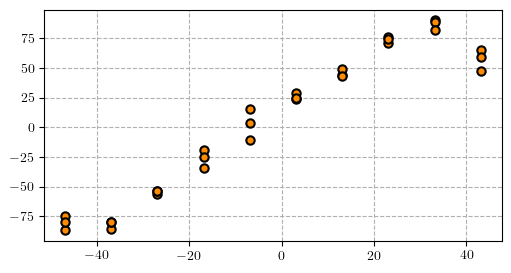

In [126]:
position13c2 = np.array(data13c2['position'])[1:]-65
field13c21 = np.array(data13c2['field1'])[1:]
field13c22 = np.array(data13c2['field2'])[1:]
field13c23 = np.array(data13c2['field3'])[1:]
field13c2_mean = np.mean([field13c21, field13c22, field13c23], axis=0)
field13c2_std = np.std([field13c21, field13c22, field13c23], axis=0)
plt.plot(position13c2, field13c21, 'ro', label='Field 1')
plt.plot(position13c2, field13c22, 'go', label='Field 2')
plt.plot(position13c2, field13c23, 'bo', label='Field 3')

Fit gradient: 25.7741 ± 0.3656 G/cm


Text(0.5, 1.0, '(1) $\\rightarrow \\ $(3) axis, permanent magnets with 9A current')

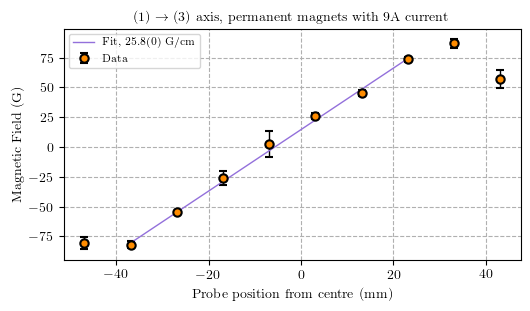

In [129]:
from scipy.optimize import curve_fit

# Calculate mean and std for 13c2
field13c2_mean = np.mean([field13c21, field13c22, field13c23], axis=0)
field13c2_std = np.std([field13c21, field13c22, field13c23], axis=0)

plt.errorbar(position13c2, field13c2_mean, yerr=field13c2_std, fmt='ko', ecolor='black', capsize=3, label='Data')

def linear(x, m, c):
    return m * x + c

# Fit to 2nd to 8th points (index 1 to 7, exclusive of 8)
x_fit_13c2 = position13c2[1:8]
y_fit_13c2 = field13c2_mean[1:8]
yerr_fit_13c2 = field13c2_std[1:8]

popt_13c2, pcov_13c2 = curve_fit(linear, x_fit_13c2, y_fit_13c2, sigma=yerr_fit_13c2, absolute_sigma=True)
slope_13c2, intercept_13c2 = popt_13c2
slope_err_13c2 = np.sqrt(pcov_13c2[0, 0])

print(f"Fit gradient: {slope_13c2*10:.4f} ± {slope_err_13c2*10:.4f} G/cm")

x_line_13c2 = np.linspace(np.min(x_fit_13c2), np.max(x_fit_13c2), 100)
plt.plot(x_line_13c2, linear(x_line_13c2, slope_13c2, intercept_13c2), '-', color='mediumpurple',
         label='Fit, {:.1f}({:.0f}) G/cm'.format(slope_13c2*10, slope_err_13c2*10))

plt.legend()
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title(r"(1) $\rightarrow \ $(3) axis, permanent magnets with 9A current")

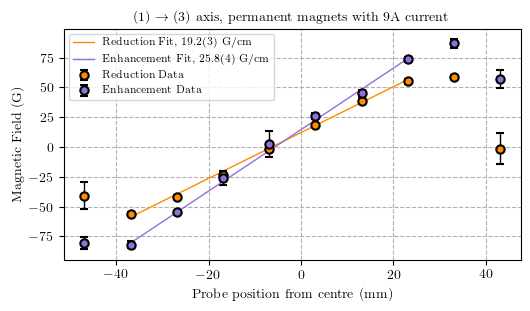

In [154]:
# Now overlay both plots on the same plot

plt.errorbar(position13c1, field13c1_mean, yerr=field13c1_std, fmt='o', markerfacecolor='darkorange', ecolor='black', capsize=3, label='Reduction Data')
plt.plot(x_line_13c1, linear(x_line_13c1, slope_13c1, intercept_13c1), '-', color='darkorange',
         label='Reduction Fit, {:.1f}({:.0f}) G/cm'.format(slope_13c1*10, slope_err_13c1*100))
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title(r"(1) $\rightarrow \ $(3) axis, permanent magnets with 9A current")


plt.errorbar(position13c2, field13c2_mean, yerr=field13c2_std, fmt='ko', markerfacecolor='mediumpurple', ecolor='black', capsize=3, label='Enhancement Data')
plt.plot(x_line_13c2, linear(x_line_13c2, slope_13c2, intercept_13c2), '-', color='mediumpurple',
         label='Enhancement Fit, {:.1f}({:.0f}) G/cm'.format(slope_13c2*10, slope_err_13c2*100))
plt.legend()

(array([ -2.01 , 108.781]), array([385.7]), 2, array([1.40414754, 0.168433  ]), 3.3306690738754696e-15)
(array([ -2.68 , 149.308]), array([388.4]), 2, array([1.40414754, 0.168433  ]), 3.3306690738754696e-15)


/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be

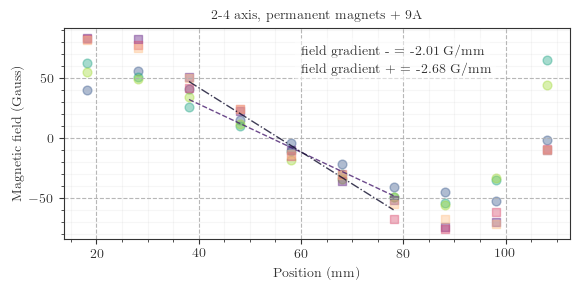

In [146]:
data24c1 = create_data_frame(displacement24c1, field24c11, field24c12, field24c13)
data24c2 = create_data_frame(displacement24c2, field24c21, field24c22, field24c23)
plot_field_data(dataframe=data24c1, dataframe2=data24c2, xrange=[15,110], figure_title='2-4 axis, permanent magnets + 9A', fit=True, fitRange=[35,80],
                labelPosition=(60,70), doublePlot=True, fitLabels=['field gradient - ','field gradient + '])


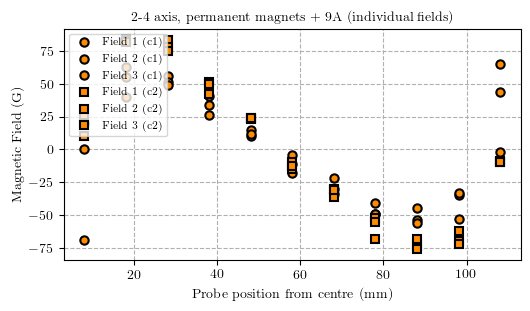

Fit gradient (24c1): -1.8606 ± 0.0724 G/mm


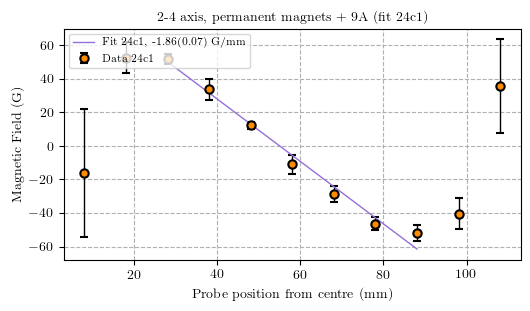

Fit gradient (24c2): -2.6486 ± 0.0606 G/mm


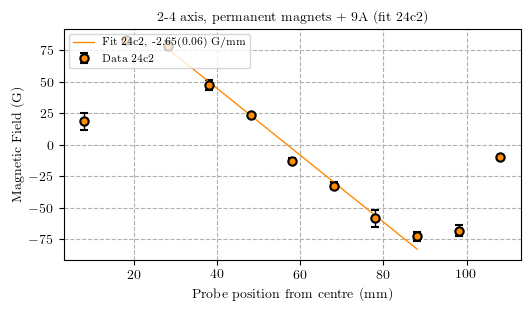

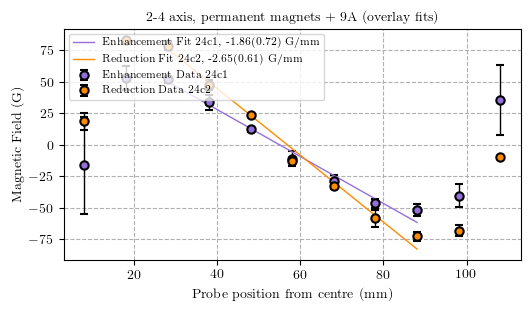

In [148]:
from scipy.optimize import curve_fit

# Prepare data for 2-4 axis, permanent magnets + 9A (data24c1 and data24c2)

# For data24c1
position24c1 = np.array(data24c1['position'])
field24c11 = np.array(data24c1['field1'])
field24c12 = np.array(data24c1['field2'])
field24c13 = np.array(data24c1['field3'])
field24c1_mean = np.mean([field24c11, field24c12, field24c13], axis=0)
field24c1_std = np.std([field24c11, field24c12, field24c13], axis=0)

# For data24c2
position24c2 = np.array(data24c2['position'])
field24c21 = np.array(data24c2['field1'])
field24c22 = np.array(data24c2['field2'])
field24c23 = np.array(data24c2['field3'])
field24c2_mean = np.mean([field24c21, field24c22, field24c23], axis=0)
field24c2_std = np.std([field24c21, field24c22, field24c23], axis=0)

# Plot for data24c1
plt.plot(position24c1, field24c11, 'ro', label='Field 1 (c1)')
plt.plot(position24c1, field24c12, 'go', label='Field 2 (c1)')
plt.plot(position24c1, field24c13, 'bo', label='Field 3 (c1)')

# Plot for data24c2
plt.plot(position24c2, field24c21, 'rs', label='Field 1 (c2)')
plt.plot(position24c2, field24c22, 'gs', label='Field 2 (c2)')
plt.plot(position24c2, field24c23, 'bs', label='Field 3 (c2)')

plt.legend()
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title("2-4 axis, permanent magnets + 9A (individual fields)")
plt.show()

# Fit and errorbar for data24c1

plt.errorbar(position24c1, field24c1_mean, yerr=field24c1_std, fmt='ko', ecolor='black', capsize=3, label='Data 24c1')

def linear(x, m, c):
    return m * x + c

# Fit to 2nd to 8th points (index 1 to 7, exclusive of 8)
x_fit_24c1 = position24c1[2:9]
y_fit_24c1 = field24c1_mean[2:9]
yerr_fit_24c1 = field24c1_std[2:9]

popt_24c1, pcov_24c1 = curve_fit(linear, x_fit_24c1, y_fit_24c1, sigma=yerr_fit_24c1, absolute_sigma=True)
slope_24c1, intercept_24c1 = popt_24c1
slope_err_24c1 = np.sqrt(pcov_24c1[0, 0])

print(f"Fit gradient (24c1): {slope_24c1:.4f} ± {slope_err_24c1:.4f} G/mm")

x_line_24c1 = np.linspace(np.min(x_fit_24c1), np.max(x_fit_24c1), 100)
plt.plot(x_line_24c1, linear(x_line_24c1, slope_24c1, intercept_24c1), '-', color='mediumpurple',
         label='Fit 24c1, {:.2f}({:.2f}) G/mm'.format(slope_24c1, slope_err_24c1))

plt.legend()
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title("2-4 axis, permanent magnets + 9A (fit 24c1)")
plt.show()

# Fit and errorbar for data24c2
plt.errorbar(position24c2, field24c2_mean, yerr=field24c2_std, fmt='ko', ecolor='black', capsize=3, label='Data 24c2')

x_fit_24c2 = position24c2[2:9]
y_fit_24c2 = field24c2_mean[2:9]
yerr_fit_24c2 = field24c2_std[2:9]

popt_24c2, pcov_24c2 = curve_fit(linear, x_fit_24c2, y_fit_24c2, sigma=yerr_fit_24c2, absolute_sigma=True)
slope_24c2, intercept_24c2 = popt_24c2
slope_err_24c2 = np.sqrt(pcov_24c2[0, 0])

print(f"Fit gradient (24c2): {slope_24c2:.4f} ± {slope_err_24c2:.4f} G/mm")

x_line_24c2 = np.linspace(np.min(x_fit_24c2), np.max(x_fit_24c2), 100)
plt.plot(x_line_24c2, linear(x_line_24c2, slope_24c2, intercept_24c2), '-', color='darkorange',
         label='Fit 24c2, {:.2f}({:.2f}) G/mm'.format(slope_24c2, slope_err_24c2))

plt.legend()
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title("2-4 axis, permanent magnets + 9A (fit 24c2)")
plt.show()

# Overlay both fits and errorbars
plt.errorbar(position24c1, field24c1_mean, yerr=field24c1_std, fmt='o', markerfacecolor='mediumpurple', ecolor='black', capsize=3, label='Enhancement Data 24c1')
plt.plot(x_line_24c1, linear(x_line_24c1, slope_24c1, intercept_24c1), '-', color='mediumpurple',
         label='Enhancement Fit 24c1, {:.2f}({:.2f}) G/mm'.format(slope_24c1, slope_err_24c1*10))
plt.errorbar(position24c2, field24c2_mean, yerr=field24c2_std, fmt='ko', markerfacecolor='darkorange', ecolor='black', capsize=3, label='Reduction Data 24c2')
plt.plot(x_line_24c2, linear(x_line_24c2, slope_24c2, intercept_24c2), '-', color='darkorange',
         label='Reduction Fit 24c2, {:.2f}({:.2f}) G/mm'.format(slope_24c2, slope_err_24c2*10))
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title("2-4 axis, permanent magnets + 9A (overlay fits)")
plt.legend()
plt.show()

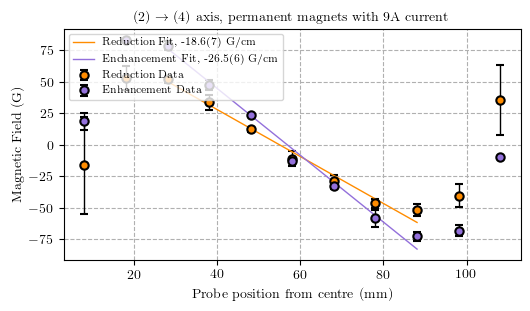

In [153]:
# Now overlay both plots on the same plot

plt.errorbar(position24c1, field24c1_mean, yerr=field24c1_std, fmt='o', markerfacecolor='darkorange', ecolor='black', capsize=3, label='Reduction Data')
plt.plot(x_line_24c1, linear(x_line_24c1, slope_24c1, intercept_24c1), '-', color='darkorange',
         label='Reduction Fit, {:.1f}({:.0f}) G/cm'.format(slope_24c1*10, slope_err_24c1*100))
plt.xlabel("Probe position from centre (mm)")
plt.ylabel("Magnetic Field (G)")
plt.title(r"(2) $\rightarrow \ $(4) axis, permanent magnets with 9A current")


plt.errorbar(position24c2, field24c2_mean, yerr=field24c2_std, fmt='ko', markerfacecolor='mediumpurple', ecolor='black', capsize=3, label='Enhancement Data')
plt.plot(x_line_24c2, linear(x_line_24c2, slope_24c2, intercept_24c2), '-', color='mediumpurple',
         label='Enchancement Fit, {:.1f}({:.0f}) G/cm'.format(slope_24c2*10, slope_err_24c2*100))
plt.legend()

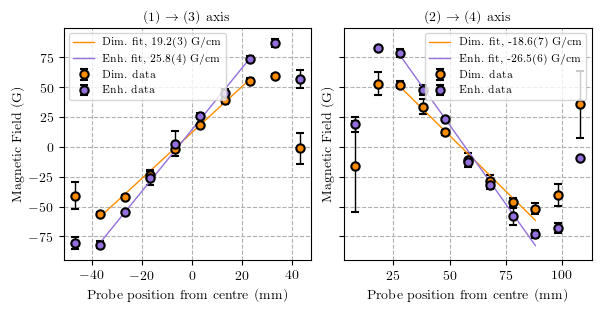

In [170]:
# NOW COMBINE BOTH PLOTS

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)

ax1.errorbar(position13c1, field13c1_mean, yerr=field13c1_std, fmt='o', markerfacecolor='darkorange', ecolor='black', capsize=3, label='Dim. data')
ax1.plot(x_line_13c1, linear(x_line_13c1, slope_13c1, intercept_13c1), '-', color='darkorange',
         label='Dim. fit, {:.1f}({:.0f}) G/cm'.format(slope_13c1*10, slope_err_13c1*100))
ax1.set_xlabel("Probe position from centre (mm)")
ax1.set_ylabel("Magnetic Field (G)")
ax1.set_title(r"(1) $\rightarrow \ $(3) axis")
ax1.errorbar(position13c2, field13c2_mean, yerr=field13c2_std, fmt='ko', markerfacecolor='mediumpurple', ecolor='black', capsize=3, label='Enh. data')
ax1.plot(x_line_13c2, linear(x_line_13c2, slope_13c2, intercept_13c2), '-', color='mediumpurple',
         label='Enh. fit, {:.1f}({:.0f}) G/cm'.format(slope_13c2*10, slope_err_13c2*100))
ax1.legend()

ax2.errorbar(position24c1, field24c1_mean, yerr=field24c1_std, fmt='o', markerfacecolor='darkorange', ecolor='black', capsize=3, label='Dim. data')
ax2.plot(x_line_24c1, linear(x_line_24c1, slope_24c1, intercept_24c1), '-', color='darkorange',
         label='Dim. fit, {:.1f}({:.0f}) G/cm'.format(slope_24c1*10, slope_err_24c1*100))
ax2.set_xlabel("Probe position from centre (mm)")
ax2.set_ylabel("Magnetic Field (G)")
ax2.set_title(r"(2) $\rightarrow \ $(4) axis")
ax2.errorbar(position24c2, field24c2_mean, yerr=field24c2_std, fmt='ko', markerfacecolor='mediumpurple', ecolor='black', capsize=3, label='Enh. data')
ax2.plot(x_line_24c2, linear(x_line_24c2, slope_24c2, intercept_24c2), '-', color='mediumpurple',
         label='Enh. fit, {:.1f}({:.0f}) G/cm'.format(slope_24c2*10, slope_err_24c2*100))
ax2.legend(loc='upper right')
plt.savefig("250515 2DMOTPermanentMagnetWithCoilEnhancementReductionCalibration.pdf", dpi=300)

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))


(array([   2.44380952, -147.09326984]), array([519.7015873]), 2, array([1.40188091, 0.1863596 ]), 3.9968028886505635e-15)


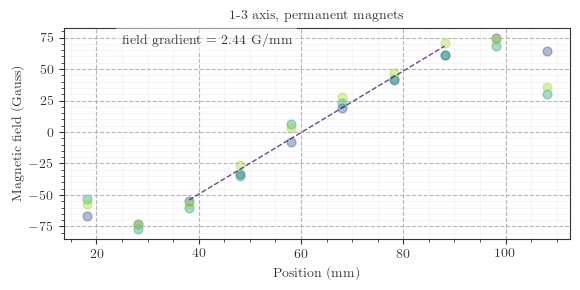

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))


(array([ -2.36      , 140.69377778]), array([506.71111111]), 2, array([1.40188091, 0.1863596 ]), 3.9968028886505635e-15)


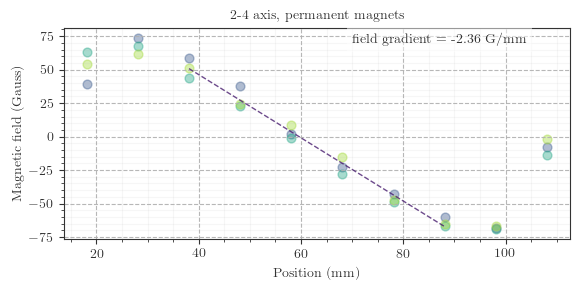

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be

(array([   2.03666667, -120.26366667]), array([84.9]), 2, array([1.40414754, 0.168433  ]), 3.3306690738754696e-15)
(array([   2.52      , -147.74533333]), array([622.13333333]), 2, array([1.40414754, 0.168433  ]), 3.3306690738754696e-15)


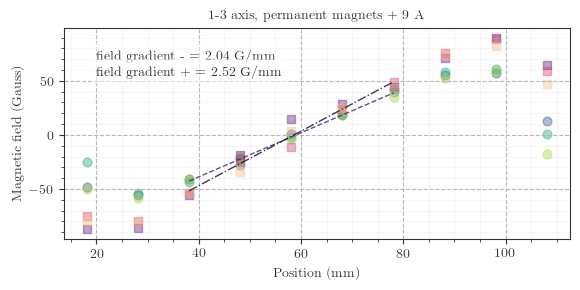

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be

(array([ -2.01 , 108.781]), array([385.7]), 2, array([1.40414754, 0.168433  ]), 3.3306690738754696e-15)
(array([ -2.68 , 149.308]), array([388.4]), 2, array([1.40414754, 0.168433  ]), 3.3306690738754696e-15)


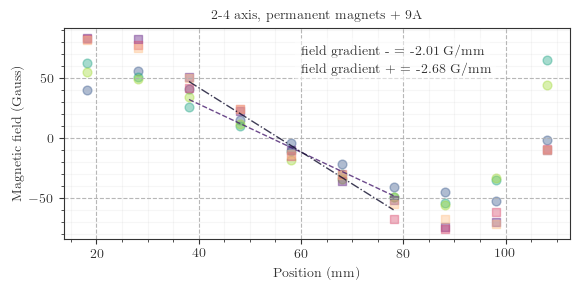

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be

(array([ -2.45666667, 166.909     ]), array([67.3]), 2, array([1.40659278, 0.14661769]), 3.3306690738754696e-15)
(array([ -2.60333333, 172.28366667]), array([119.56666667]), 2, array([1.40659278, 0.14661769]), 3.3306690738754696e-15)


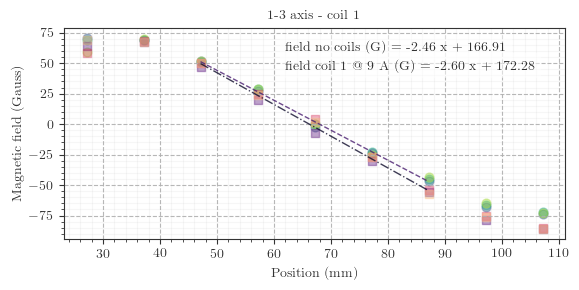

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be

(array([ -2.45666667, 166.909     ]), array([67.3]), 2, array([1.40659278, 0.14661769]), 3.3306690738754696e-15)
(array([ -2.61666667, 179.97833333]), array([52.76666667]), 2, array([1.40659278, 0.14661769]), 3.3306690738754696e-15)


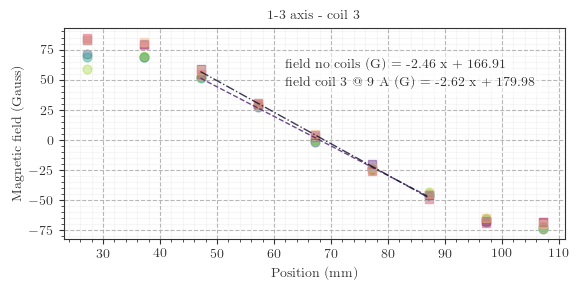

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be

(array([   2.31666667, -161.115     ]), array([35.83333333]), 2, array([1.404757  , 0.16327205]), 2.6645352591003757e-15)
(array([   2.42333333, -165.47233333]), array([78.1]), 2, array([1.40659278, 0.14661769]), 3.3306690738754696e-15)


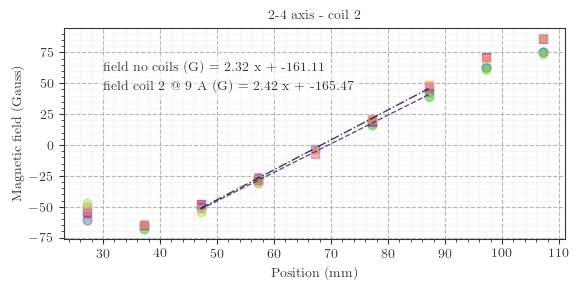

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position']
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_42938/3188754596.py:161: SettingWithCopyWarning: 
A value is trying to be

(array([   2.31666667, -161.115     ]), array([35.83333333]), 2, array([1.404757  , 0.16327205]), 2.6645352591003757e-15)
(array([   2.43333333, -175.54333333]), array([51.6]), 2, array([1.40659278, 0.14661769]), 3.3306690738754696e-15)


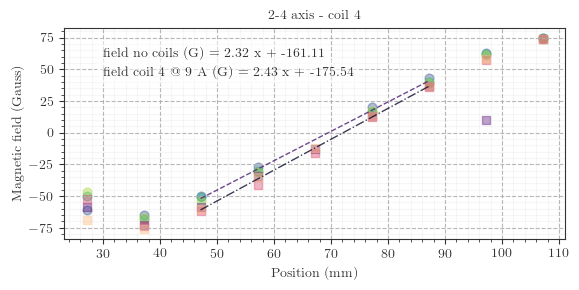

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------
# Calibration data - chamber 1 magnets
# 12/10/2022 - magnets only
# 1-3 axis (measured from front face of main coil holder not permanent magnet holder)
displacement13 = np.linspace(20, 120, 11) - 11.9
field131 = np.array([33, -67, -73, -55, -33, -8, 19, 41, 61, 75, 64])
# swapped probe to less sensitive since reaching range of previous probe
field132 = np.array([67, -53, -77, -60, -35, 6, 23, 42, 61, 68, 30])  # last 2 points gaussmeter froze so we reset
field133 = np.array([70, -57, -73, -57, -26, 3, 28, 47, 71, 73, 36])

# 2-4 axis
displacement24 = np.linspace(20, 120, 11) - 11.9
field241 = np.array([-82, 39, 74, 59, 38, 2, -23, -43, -60, -68, -8])
field242 = np.array([-18, 63, 68, 44, 23, -1, -28, -49, -67, -69, -14])
field243 = np.array([-58, 54, 62, 51, 24, 9, -15, -47, -65, -67, -2])
# field24av = np.mean([field241, field242, field243], axis=0)
# df24 = pd.DataFrame(np.transpose([displacement24, field241, field242, field243, field24av]), columns = ['position (mm)','field 1 (Gauss)','field 2 (Gauss)', 'field 3 (Gauss)', 'average field (Gauss)'])
# df24m = df24.melt('position (mm)', var_name='data label', value_name='field (Gauss)')


# 13/10/2022 - permanent magnets and coils (9 A)
# + to R1, - to R4 (expect subtraction)
# 1-3 axis
displacement13c1 = np.linspace(20, 120, 11) - 11.9
field13c11 = np.array([110, -48, -56, -41, -22, 1, 18, 42, 55, 57, 13])
field13c12 = np.array([79, -25, -54, -44, -28, -2, 19, 40, 58, 61, 1])
field13c13 = np.array([150, -50, -58, -41, -20, -4, 18, 35, 53, 59, -18])
# 2-4 axis
displacement24c1 = np.linspace(20, 120, 11) - 11.9
field24c11 = np.array([-69, 40, 56, 41, 15, -4, -22, -41, -45, -53, -2])
field24c12 = np.array([20, 63, 51, 26, 10, -11, -30, -49, -54, -35, 65])
field24c13 = np.array([0, 55, 49, 34, 12, -18, -34, -49, -56, -33, 44])

# 9A + to R4, - to R1 (expect addition)
# 1-3
displacement13c2 = np.linspace(20, 120, 11) - 11.9
field13c21 = np.array([60, -87, -86, -56, -19, 15, 29, 44, 71, 90, 65])
field13c22 = np.array([-25, -75, -80, -54, -25, -11, 24, 49, 76, 89, 59])
field13c23 = np.array([12, -80, -80, -54, -34, 4, 25, 43, 74, 82, 47])
# 2-4
displacement24c2 = np.linspace(20, 120, 11) - 11.9
field24c21 = np.array([10, 84, 83, 51, 23, -10, -36, -52, -74, -70, -10])
field24c22 = np.array([26, 83, 78, 42, 24, -15, -30, -68, -76, -62, -9])
field24c23 = np.array([20, 82, 75, 50, 24, -13, -31, -55, -68, -72, -10])


# 14/10/2022 - tuning with individual coils
# Magnets only
# 1-3 axis (measuring from 3, with an additional 1 mm offset to the permanent magnet front face)
displacement132 = np.linspace(20, 120, 11) - 12.9
field1321 = np.array([-160, 11, 71, 69, 52, 27, -2, -24, -47, -68, -74])
field1322 = np.array([-176, 18, 69, 69, 51, 29, 0, -23, -45, -66, -72])
field1323 = np.array([-161, -10, 59, 70, 52, 29, 0, -25, -43, -65, -73])
# 2-4 axis (measuring from 4, with an additional 1 mm offset to the permanent magnet front face)
displacement242 = np.linspace(20, 120, 11) - 12.9
field2421 = np.array([169, -13, -61, -65, -50, -27, 3, 20, 43, 63, 75])
field2422 = np.array([140, -45, -50, -68, -51, -30, 5, 16, 40, 62, 75])
field2423 = np.array([148, -20, -47, -67, -54, -31, 11, 17, 39, 61, 74])
# Unknown sign of data points around zero - remove these points
displacement242 = np.array([20, 30, 40, 50, 60, 70, 90, 100, 110, 120]) - 12.9
field2421 = np.array([169, -13, -61, -65, -50, -27, 20, 43, 63, 75])
field2422 = np.array([140, -45, -50, -68, -51, -30, 16, 40, 62, 75])
field2423 = np.array([148, -20, -47, -67, -54, -31, 17, 39, 61, 74])

# One coil at a time
# Coil 1 - 9 A, - to red, + to black
displacement132c1 = np.linspace(20, 120, 11) - 12.9
field132c11 = np.array([-150, -6, 64, 67, 47, 20, -7, -30, -56, -79, -86])
field132c12 = np.array([-150, -14, 58, 68, 50, 25, 4, -27, -54, -75, -85])
field132c13 = np.array([-130, -10, 69, 67, 50, 24, 2, -27, -57, -76, -86]) # note - unsure if second point is + or - although this won't affect fit
# Coil 3 - 9A, + to black, - to red
displacement132c2 = np.linspace(20, 120, 11) - 12.9
field132c21 = np.array([-112, 28, 83, 80, 59, 31, 4, -20, -46, -67, -68])
field132c22 = np.array([-90, 45, 85, 79, 55, 30, 2, -26, -49, -69, -68])
field132c23 = np.array([-115, 32, 83, 81, 58, 31, 5, -23, -45, -65, -70])
# Coil 2 - 9 A, + to red, - to black
displacement242c1 = np.linspace(30, 120, 10) - 12.9
field242c11 = np.array([2, -55, -65, -48, -28, -3, 19, 48, 71, 86])
field242c12 = np.array([11, -54, -65, -48, -26, -7, 21, 46, 71, 87])
field242c13 = np.array([35, -50, -64, -52, -30, -5, 21, 49, 70, 87])
# Coil 4 - 9 A, + to red, - to black
displacement242c2 = np.linspace(30, 120, 10) - 12.9
field242c21 = np.array([3, -59, -73, -59, -34, -13, 13, 37, 10, 74])
field242c22 = np.array([37, -52, -74, -62, -41, -16, 12, 36, 57, 74])
field242c23 = np.array([12, -69, -76, -60, -35, -12, 13, 37, 58, 74])


# ------------------
# Analysis functions

def create_data_frame(x_data, field_data1, field_data2, field_data3):
    df = pd.DataFrame(np.transpose([x_data, field_data1, field_data2, field_data3]),
                      columns=['position','field1','field2', 'field3'])
    df['fieldAvg'] = df.loc[:, df.columns != 'position'].mean(axis=1)
    return df


def set_plot_parameters():
    return


def plot_field_data(dataframe, dataframe2='', figure_title='', xrange='', yrange='', fit=False, fitRange='', labelPosition=(70,70), doublePlot=False, fitLabels=['',''], labelType=''):
    cmap1 = plt.cm.viridis
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['font.sans-serif'] = ['Garamond']
    textColour = (0.2, 0.2, 0.2)
    if xrange:
        dataframe = dataframe.loc[(dataframe['position'].between(np.min(xrange), np.max(xrange), inclusive='both'))]
        if doublePlot:
            dataframe2 = dataframe2.loc[(dataframe2['position'].between(np.min(xrange), np.max(xrange), inclusive='both'))]
    fig, axes = plt.subplots()
    sizes = 40
    alphas = 0.4
    dataframe.plot(ax=axes, kind='scatter', x='position', y='field1', color=cmap1(70), alpha=alphas, s=sizes)
    dataframe.plot(ax=axes, kind='scatter', x='position', y='field2', color=cmap1(150), alpha=alphas, s=sizes)
    dataframe.plot(ax=axes, kind='scatter', x='position', y='field3', color=cmap1(220), alpha=alphas, s=sizes)

    if doublePlot:
        shapes2 = 's'
        cmap2 = plt.cm.magma
        dataframe2.plot(ax=axes, kind='scatter', x='position', y='field1', color=cmap2(70), alpha=alphas, s=sizes, marker=shapes2)
        dataframe2.plot(ax=axes, kind='scatter', x='position', y='field2', color=cmap2(150), alpha=alphas, s=sizes, marker=shapes2)
        dataframe2.plot(ax=axes, kind='scatter', x='position', y='field3', color=cmap2(220), alpha=alphas, s=sizes, marker=shapes2)

    if yrange:
        axes.set(ylim=yrange)
    if fit:
        plot_fit_data(dataframe, fitRange, cmap1, axes, labelPosition, textColour, label=fitLabels[0], lineStyle='--', lT=labelType)
        if doublePlot:
            offsetLabel = np.subtract(labelPosition,(0,15))
            plot_fit_data(dataframe2, fitRange, cmap2, axes, offsetLabel, textColour, label=fitLabels[1], lineStyle='-.', lT=labelType)

    axes.set_xlabel('Position (mm)', fontsize=10, color=textColour)
    axes.set_ylabel('Magnetic field (Gauss)', fontsize=10, color=textColour)
    axes.set_title(figure_title, weight='bold', color=textColour)
    axes.tick_params(colors=textColour)
    axes.tick_params(color=textColour, labelcolor=textColour, which='both')
    for spine in axes.spines.values():
        spine.set_edgecolor(textColour)

    plt.minorticks_on()
    axes.grid(True, which='major', alpha = 0.9)
    axes.grid(True, which='minor', linestyle='-', alpha=0.1)

    # axes.legend(fitLabels)

    fig.tight_layout()
    plt.show()


def fit_field_data(dataframe, xrange):
    dfred = dataframe.loc[(dataframe['position'].between(np.min(xrange), np.max(xrange), inclusive='both'))]
    dfm = dfred.melt('position', var_name='dataLabel', value_name='field')
    dfmred = dfm.loc[(dfm['dataLabel'] != 'fieldAvg')]

    fit = np.polyfit(dfmred['position'].values.flatten(), dfmred['field'].values.flatten(), 1, full=True)
    dataframe['fit'] = dataframe['position']
    # dataframe['residuals'] = dataframe['field']
    # dataframe['stError'] = dataframe['position']
    dataframe['fit'] = dataframe['position'].apply(lambda x: np.polyval(fit[0],x))
    # dataframe['residuals'] -= dataframe['fit']
    # dataframe['stError'] = np.sqrt(np.sum())
    # print(dataframe)
    print(fit)
    return fit, dataframe


def plot_fit_data(df, fr, cm, ax, lP, tC, lT='', label='', lineStyle='-'):
    fitting = fit_field_data(df, fr)
    fitdf = fitting[1]
    fitdfRed = fitdf.loc[fitdf['position'].between(np.min(fr), np.max(fr), inclusive='both')]
    fitdfRed.plot(ax=ax, kind='line', x='position', y='fit', color=cm(20), alpha=0.8, legend=None, style=lineStyle)
    if label:
        if lT=='fullFit':
            fitLabel = label + ' = {:.2f} x + '.format(fitting[0][0][0]) + ' {:.2f}'.format(fitting[0][0][1])
        else:
            fitLabel = label + ' = {:.2f} G/mm'.format(fitting[0][0][0])
    else:
        fitLabel = 'field gradient = {:.2f} G/mm'.format(fitting[0][0][0])
    textbox = ax.annotate(fitLabel, xy=lP,
                            backgroundcolor='1', alpha=1, color=tC)
    textbox.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='none'))


# ---------------------
# Analysis and plotting

data13 = create_data_frame(displacement13, field131, field132, field133)
plot_field_data(data13, xrange=[15,110], figure_title='1-3 axis, permanent magnets', fit=True, fitRange=[35,90], labelPosition=(25,70))

data24 = create_data_frame(displacement24, field241, field242, field243)
plot_field_data(data24, xrange=[15,110], figure_title='2-4 axis, permanent magnets', fit=True, fitRange=[35,90], labelPosition=(70,70))


data13c1 = create_data_frame(displacement13c1, field13c11, field13c12, field13c13)
data13c2 = create_data_frame(displacement13c2, field13c21, field13c22, field13c23)
plot_field_data(dataframe=data13c1, dataframe2=data13c2, xrange=[15,110], figure_title='1-3 axis, permanent magnets + 9 A', fit=True, fitRange=[35,80],
                labelPosition=(20,70), doublePlot=True, fitLabels=['field gradient - ','field gradient + '])

data24c1 = create_data_frame(displacement24c1, field24c11, field24c12, field24c13)
data24c2 = create_data_frame(displacement24c2, field24c21, field24c22, field24c23)
plot_field_data(dataframe=data24c1, dataframe2=data24c2, xrange=[15,110], figure_title='2-4 axis, permanent magnets + 9A', fit=True, fitRange=[35,80],
                labelPosition=(60,70), doublePlot=True, fitLabels=['field gradient - ','field gradient + '])


# 14/10/2022
data132 = create_data_frame(displacement132, field1321, field1322, field1323)
data132c1 = create_data_frame(displacement132c1, field132c11, field132c12, field132c13)
data132c2 = create_data_frame(displacement132c2, field132c21, field132c22, field132c23)
plot_field_data(data132, dataframe2=data132c1, xrange=[20,110], figure_title='1-3 axis - coil 1', fit=True, fitRange=[40,90], labelPosition=(62,60),
                doublePlot=True, labelType='fullFit', fitLabels=['field no coils (G) ', 'field coil 1 @ 9 A (G) '])
plot_field_data(data132, dataframe2=data132c2, xrange=[20,110], figure_title='1-3 axis - coil 3', fit=True, fitRange=[40,90], labelPosition=(62,60),
                doublePlot=True, labelType='fullFit', fitLabels=['field no coils (G) ', 'field coil 3 @ 9 A (G) '])

data242 = create_data_frame(displacement242, field2421, field2422, field2423)
data242c1 = create_data_frame(displacement242c1, field242c11, field242c12, field242c13)
data242c2 = create_data_frame(displacement242c2, field242c21, field242c22, field242c23)
plot_field_data(data242, dataframe2=data242c1, xrange=[20,110], figure_title='2-4 axis - coil 2', fit=True, fitRange=[40,90], labelPosition=(30,60),
                doublePlot=True, labelType='fullFit', fitLabels=['field no coils (G) ', 'field coil 2 @ 9 A (G)'])
plot_field_data(data242, dataframe2=data242c2, xrange=[20,110], figure_title='2-4 axis - coil 4', fit=True, fitRange=[40,90], labelPosition=(30,60),
                doublePlot=True, labelType='fullFit', fitLabels=['field no coils (G) ', 'field coil 4 @ 9 A (G) '])